In [44]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import keras as ks

# **Loading and Splitting the Dataset**

In [45]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [46]:
print("Shape of training data:")
print(X_train.shape)
print(Y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(Y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


In [47]:
XTotal = np.concatenate([X_train, X_test], axis=0)
YTotal = np.concatenate([Y_train, Y_test], axis=0)
print(XTotal.shape, YTotal.shape)

(60000, 32, 32, 3) (60000, 1)


In [48]:
# Normalizing
XTotal = XTotal.astype('float32')
XTotal /= 255 

YTotal = YTotal.reshape(-1, )
print(XTotal.shape, YTotal.shape)

(60000, 32, 32, 3) (60000,)


In [49]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (25,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

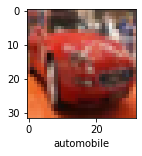

In [50]:
 plot_sample(XTotal, YTotal, 5)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XTotal, YTotal, test_size=0.30, random_state=49)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(42000, 32, 32, 3) (42000,) (18000, 32, 32, 3) (18000,)


In [52]:
def plot(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# **No BatchNormalization**

In [ ]:
cnn = models.Sequential([
    layers.ZeroPadding2D(1),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
opt = ks.optimizers.SGD(learning_rate=0.01)
cnn.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = cnn.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
1050/1050 - 43s - loss: 1.9513 - accuracy: 0.3089 - val_loss: 1.7884 - val_accuracy: 0.3769
Epoch 2/20
1050/1050 - 42s - loss: 1.6993 - accuracy: 0.4122 - val_loss: 1.6024 - val_accuracy: 0.4577
Epoch 3/20
1050/1050 - 41s - loss: 1.5510 - accuracy: 0.4621 - val_loss: 1.5165 - val_accuracy: 0.4694
Epoch 4/20
1050/1050 - 42s - loss: 1.4466 - accuracy: 0.4934 - val_loss: 1.4015 - val_accuracy: 0.5124
Epoch 5/20
1050/1050 - 45s - loss: 1.3755 - accuracy: 0.5199 - val_loss: 1.3493 - val_accuracy: 0.5282
Epoch 6/20
1050/1050 - 45s - loss: 1.3229 - accuracy: 0.5407 - val_loss: 1.3304 - val_accuracy: 0.5380
Epoch 7/20
1050/1050 - 47s - loss: 1.2889 - accuracy: 0.5511 - val_loss: 1.3036 - val_accuracy: 0.5442
Epoch 8/20
1050/1050 - 48s - loss: 1.2581 - accuracy: 0.5634 - val_loss: 1.3110 - val_accuracy: 0.5423
Epoch 9/20
1050/1050 - 48s - loss: 1.2339 - accuracy: 0.5732 - val_loss: 1.2805 - val_accuracy: 0.5460
Epoch 10/20
1050/1050 - 46s - loss: 1.2129 - accuracy: 0.5782 - val_loss:

In [ ]:
cnn.evaluate(X_test,Y_test)

563/563 [==============================] - 5s 9ms/step - loss: 1.1256 - accuracy: 0.6117


[1.1256446838378906, 0.6117222309112549]

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                163850    
Total params: 165,642
Trainable params: 165,642
Non-trainable params: 0
________________________________________________

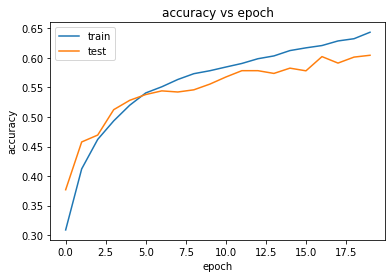

In [ ]:
plot(history1)

#**Two Dense Layers**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

In [ ]:
opt = ks.optimizers.SGD(learning_rate=0.01)
cnn.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = cnn.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
1050/1050 - 77s - loss: 2.1424 - accuracy: 0.2056 - val_loss: 1.9925 - val_accuracy: 0.2851
Epoch 2/20
1050/1050 - 73s - loss: 1.9184 - accuracy: 0.3073 - val_loss: 1.8213 - val_accuracy: 0.3508
Epoch 3/20
1050/1050 - 73s - loss: 1.7485 - accuracy: 0.3701 - val_loss: 1.6388 - val_accuracy: 0.4130
Epoch 4/20
1050/1050 - 73s - loss: 1.6308 - accuracy: 0.4154 - val_loss: 1.5307 - val_accuracy: 0.4568
Epoch 5/20
1050/1050 - 73s - loss: 1.5423 - accuracy: 0.4465 - val_loss: 1.4416 - val_accuracy: 0.4843
Epoch 6/20
1050/1050 - 74s - loss: 1.4729 - accuracy: 0.4687 - val_loss: 1.4721 - val_accuracy: 0.4820
Epoch 7/20
1050/1050 - 74s - loss: 1.4204 - accuracy: 0.4880 - val_loss: 1.3477 - val_accuracy: 0.5235
Epoch 8/20
1050/1050 - 73s - loss: 1.3800 - accuracy: 0.5066 - val_loss: 1.3107 - val_accuracy: 0.5374
Epoch 9/20
1050/1050 - 74s - loss: 1.3391 - accuracy: 0.5216 - val_loss: 1.2770 - val_accuracy: 0.5490
Epoch 10/20
1050/1050 - 75s - loss: 1.3017 - accuracy: 0.5362 - val_loss:

In [ ]:
cnn.evaluate(X_test,Y_test)

563/563 [==============================] - 10s 18ms/step - loss: 1.0155 - accuracy: 0.6487


[1.015474557876587, 0.6486666798591614]

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

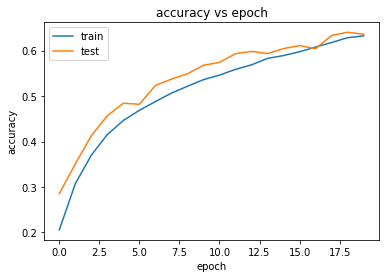

In [ ]:
plot(history2)

# **2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

In [ ]:
opt = ks.optimizers.SGD(learning_rate=0.01)
cnn.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = cnn.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
1050/1050 - 98s - loss: 1.8621 - accuracy: 0.3284 - val_loss: 1.5756 - val_accuracy: 0.4362
Epoch 2/20
1050/1050 - 106s - loss: 1.5519 - accuracy: 0.4408 - val_loss: 1.3945 - val_accuracy: 0.5013
Epoch 3/20
1050/1050 - 97s - loss: 1.4357 - accuracy: 0.4857 - val_loss: 1.2585 - val_accuracy: 0.5485
Epoch 4/20
1050/1050 - 101s - loss: 1.3631 - accuracy: 0.5144 - val_loss: 1.2451 - val_accuracy: 0.5598
Epoch 5/20
1050/1050 - 97s - loss: 1.2942 - accuracy: 0.5383 - val_loss: 1.1848 - val_accuracy: 0.5817
Epoch 6/20
1050/1050 - 99s - loss: 1.2424 - accuracy: 0.5539 - val_loss: 1.2478 - val_accuracy: 0.5655
Epoch 7/20
1050/1050 - 99s - loss: 1.1930 - accuracy: 0.5737 - val_loss: 1.0877 - val_accuracy: 0.6144
Epoch 8/20
1050/1050 - 97s - loss: 1.1554 - accuracy: 0.5860 - val_loss: 1.0526 - val_accuracy: 0.6310
Epoch 9/20
1050/1050 - 99s - loss: 1.1200 - accuracy: 0.6039 - val_loss: 1.0834 - val_accuracy: 0.6221
Epoch 10/20
1050/1050 - 95s - loss: 1.0929 - accuracy: 0.6126 - val_los

In [ ]:
cnn.evaluate(X_test,Y_test)

563/563 [==============================] - 11s 20ms/step - loss: 0.9178 - accuracy: 0.6873


[0.917837917804718, 0.687333345413208]

In [ ]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)         

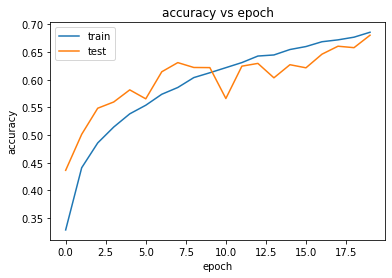

In [ ]:
plot(history3)

# **3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D**

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

In [54]:
opt = ks.optimizers.SGD(learning_rate=0.001)
cnn.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history4 = cnn.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
1050/1050 - 107s - loss: 1.5859 - accuracy: 0.4291 - val_loss: 2.0351 - val_accuracy: 0.3623
Epoch 2/20
1050/1050 - 98s - loss: 1.2597 - accuracy: 0.5512 - val_loss: 1.7102 - val_accuracy: 0.4276
Epoch 3/20
1050/1050 - 99s - loss: 1.1137 - accuracy: 0.6077 - val_loss: 1.3853 - val_accuracy: 0.5130
Epoch 4/20
1050/1050 - 100s - loss: 1.0186 - accuracy: 0.6415 - val_loss: 1.1878 - val_accuracy: 0.5949
Epoch 5/20
1050/1050 - 99s - loss: 0.9395 - accuracy: 0.6716 - val_loss: 1.1613 - val_accuracy: 0.6058
Epoch 6/20
1050/1050 - 98s - loss: 0.8771 - accuracy: 0.6926 - val_loss: 1.2451 - val_accuracy: 0.5725
Epoch 7/20
1050/1050 - 98s - loss: 0.8252 - accuracy: 0.7127 - val_loss: 1.1679 - val_accuracy: 0.6043
Epoch 8/20
1050/1050 - 97s - loss: 0.7821 - accuracy: 0.7245 - val_loss: 1.0155 - val_accuracy: 0.6461
Epoch 9/20
1050/1050 - 98s - loss: 0.7303 - accuracy: 0.7424 - val_loss: 1.6350 - val_accuracy: 0.5283
Epoch 10/20
1050/1050 - 99s - loss: 0.6898 - accuracy: 0.7591 - val_los

In [57]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
score = cnn.evaluate(X_test,Y_test,batch_size=128, verbose=0)

In [ ]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[1.1551328897476196, 0.7108888983726501]


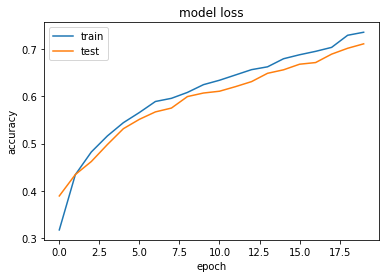

In [ ]:
plot(history4)

# **Comparison**

**Comparison**

*   Accuracy Score with No BatchNormalization is **0.61**
*   Accuracy Score with Two Dense Layers is **0.64**
*   Accuracy Score with 2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D is **0.68**
*   Accuracy Score with 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D is **0.72**


**Best Model is 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D which gave accuracy score of 0.72.**

In [59]:
import pandas as pd
import numpy as np

data = {'ModelType': ["No BatchNormalization", "Two Dense Layers", "2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D", "3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D"],
        'Time in seconds': ["758 s", "903 s", "1743 s", "2116 s"],
        'Accuracy Score': ['0.61', '0.64', '0.68', '0.72']}

df = pd.DataFrame(data)

In [60]:
df.head()

,ModelType,Time in seconds,Accuracy Score
0,No BatchNormalization,758 s,0.61
1,Two Dense Layers,903 s,0.64
2,2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D,1743 s,0.68
3,3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D,2116 s,0.72



> ***The training time increased as we increased the number of layers and blocks. But adding more layers will extract more features for our input data and hence the accuracy increases.***



# **Saving Best Model**

In [ ]:
cnn.save("myModel")

INFO:tensorflow:Assets written to: myModel/assets
